## **Постановка задачи** 
#### Провести анализ предметной области "Книги".

## **Описание предметной области** 
 Для анализа предметной области "книги" был взят набор данных [Goodreads-books](https://www.kaggle.com/jealousleopard/goodreadsbooks)[1], который содержит подробную информацию о книгах. 
#### Детальное описание полей:
* bookID - уникальный ID книги
* title - название книги
* authors - автор
* average_rating - средняя оценка книги 
* ISBN ISBN(10) - номер, в котором содержится информация о книге
* ISBN 13 - новый формат ISBN, созданный в 2007 году. Состоит из 13 цифр
* language_code - язык книги
* num_pages - количество страниц в книге
* ratings_count - количество оценок, которые получила книга
* text_reviews_count - количество рецензий
* publication_date - дата публикации книги
* publisher - имя издательства

## Анализ

In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [7]:
df.index = df['bookID']

In [8]:
print('Датасет содержит {} строк и {} столбцов'.format(df.shape[0], df.shape[1]))

Датасет содержит 11123 строк и 12 столбцов


In [9]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [10]:
# уберем Mary и оставим только J.K. Rowling
df.replace(to_replace='J.K. Rowling/Mary GrandPré', value = 'J.K. Rowling', inplace=True)

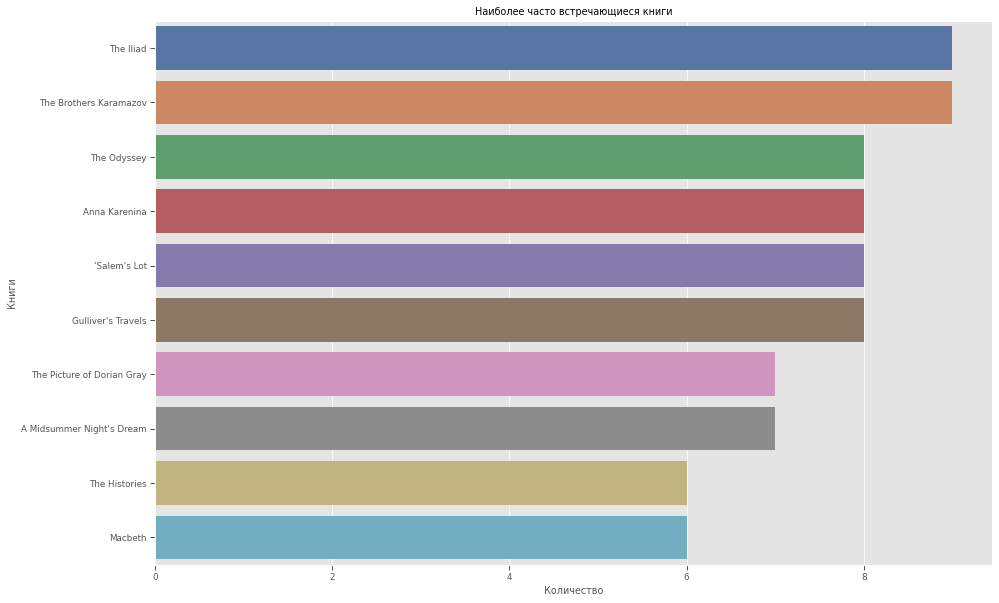

In [11]:
# количество книг, встречающиеся чаще всего
sns.set_context('paper')
plt.figure(figsize=(15,10))
books = df['title'].value_counts()[:10]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title('Наиболее часто встречающиеся книги')
plt.xlabel('Количество')
plt.ylabel('Книги')
plt.show()

In [12]:
df[df['title']=='The Brothers Karamazov']
# Видно, что книга встречается 8 раз (8 раз переиздавалась в разные даты и разными c publisher + разное кол-во страниц)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
4933,4933,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Manuel Ko...,4.32,0451527348,9780451527349,eng,736,983,91,6/1/1999,Signet Classics
4934,4934,The Brothers Karamazov,Fyodor Dostoyevsky/Fyodor Dostoevsky/Richard P...,4.32,0374528373,9780374528379,eng,796,191531,6795,6/14/2002,Farrar Straus and Giroux
4935,4935,The Brothers Karamazov,Fyodor Dostoyevsky/David McDuff,4.32,0140449248,9780140449242,eng,1013,1673,184,2/27/2003,Penguin Books Ltd
4936,4936,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0679729259,9780679729259,eng,796,617,80,9/3/1991,Vintage Books USA
4938,4938,The Brothers Karamazov,Fyodor Dostoyevsky/Simon Vance/Thomas R. Beyer...,4.32,1596440791,9781596440791,eng,16,20,2,5/1/2005,Hovel Audio
4940,4940,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Maire Jaanus,4.32,159308045X,9781593080457,eng,720,1089,202,7/25/2004,Barnes Noble Classics
5691,5691,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0099922800,9780099922803,eng,796,443,55,1/16/1992,Vintage Classics
7135,7135,The Brothers Karamazov,Fyodor Dostoyevsky/Andrew R. MacAndrew/Konstan...,4.32,0553212168,9780553212167,eng,1072,1022,154,4/1/1984,Bantam Classics
37058,37058,The Brothers Karamazov,Fyodor Dostoyevsky/Thomas R. Beyer Jr./Simon V...,4.32,1596440783,9781596440784,eng,16,3,1,5/1/2005,Hovel Audio


In [13]:
# Из графика видно, что полученные книги либо являются классикой, либо старые, либо они являются частью обязательной 
# школьной программы. Несмотря ни на что, эти книги выдержали течение времени и до сих пор актуальны

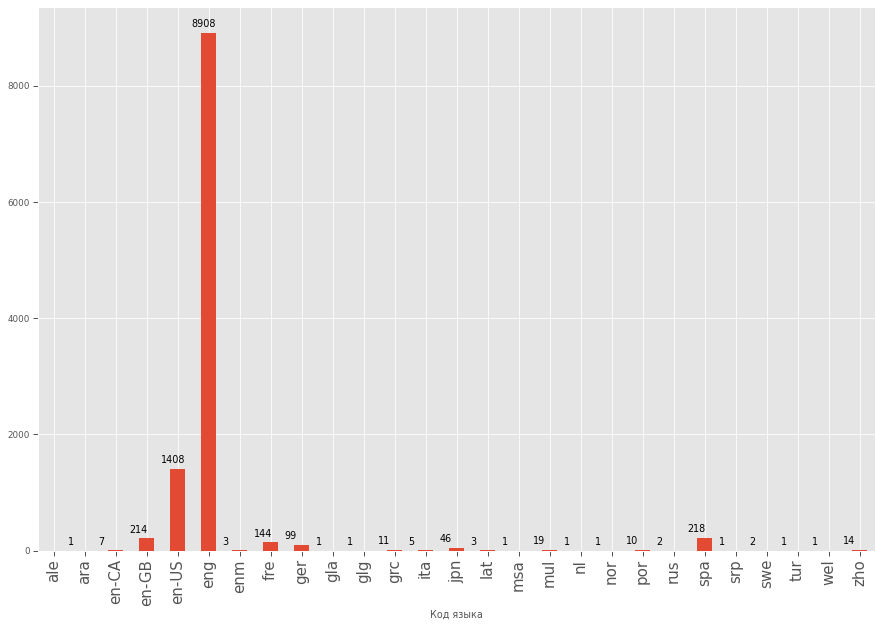

In [14]:
# Распределение книг по языкам
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.xlabel('Код языка')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

Text(0, 0.5, 'Название')

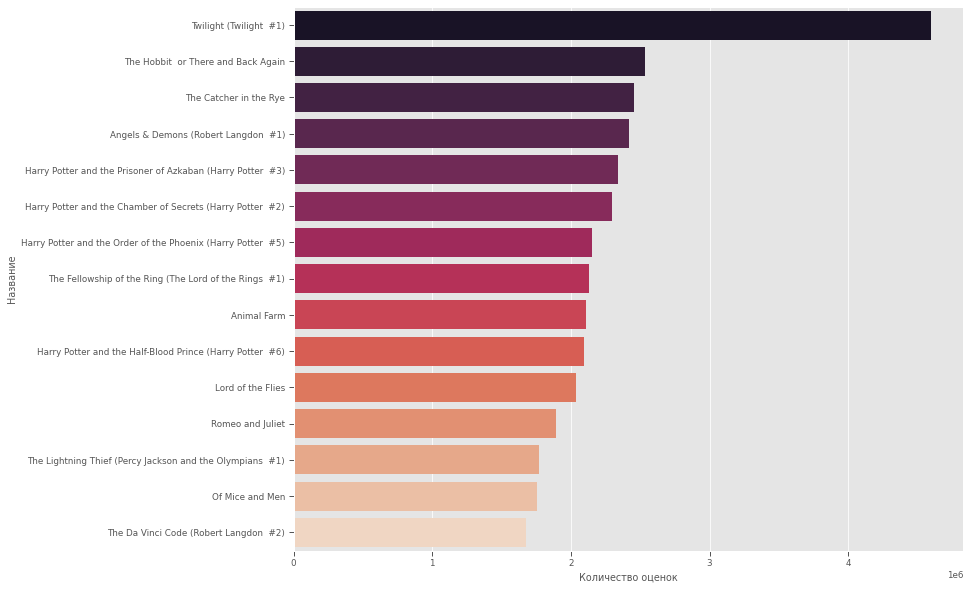

In [15]:
# Топ 10 книг по количеству оценок
most_rated = df.sort_values('ratings_count', ascending=False).head(15).set_index('title')
plt.figure(figsize=(12,10))
sns.barplot(x = most_rated['ratings_count'], y = most_rated.index, palette='rocket')
plt.xlabel('Количество оценок')
plt.ylabel('Название')
#1e6 = 1000000 (примерно)

In [16]:
# 1. Видно, что начало серии книг обычно оценивается больше всего (Twilinght #1, The Hobbit, Angels & Demons #1).
# 2. Количество оценок у серии книг Harry Potter довольно большое, из чего можно сделать вывод: если человек начал читать серию 
# книг, то он, скорее всего, стремится завершить ее до конца

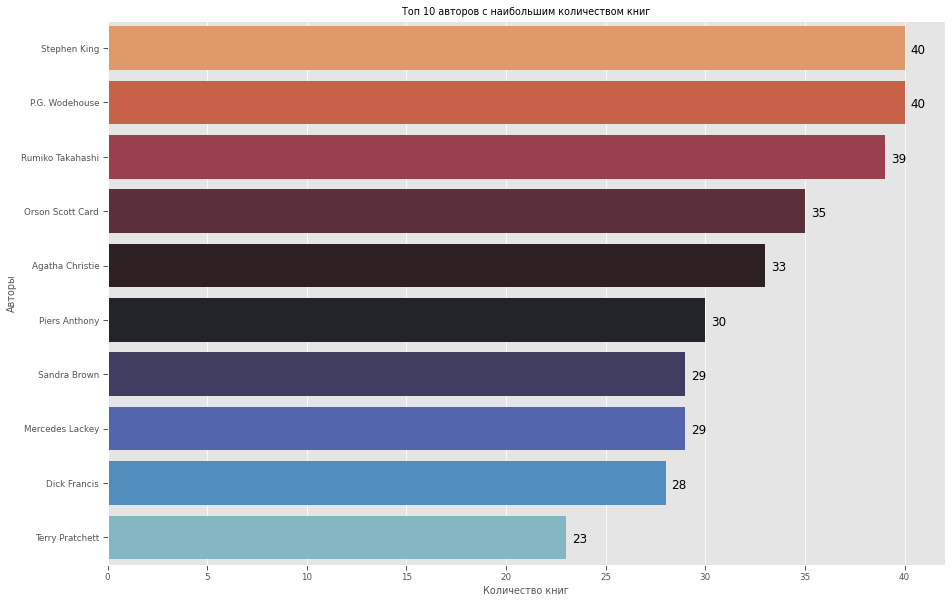

In [17]:
sns.set_context('paper')
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r')
plt.title('Топ 10 авторов с наибольшим количеством книг')
plt.xlabel('Количество книг')
plt.ylabel('Авторы')
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 12, color = 'k')

In [18]:
# 1. Видно, что больше всего книг у Стивен Кинга и Вудхауса. Стоит учесть, что многие из книг - различные издания одной 
# и той же книги
# 2. Из полученного списка авторов можно заметить, что некоторые из них - "классики", другие - пишут книги десятилетиями
# третьи - время от времени 

In [19]:
import goodreads_api_client as gr
from progressbar import ProgressBar
import re

In [20]:
client = gr.Client(developer_key= 'qI4Do63YsTPICTREpQuu0g')

In [103]:
import isbnlib
from newspaper import Article

def html(isbn):
    url = 'https://isbndb.com/book/'+isbn
    article = Article(url)
    #article = 'https://isbndb.com/book/9780450524684'
    article.download()
    article.parse()
    ar = article.html
    print('ar = ', ar)
    ar = ar[9300:9900]
    return ar

def html_all(isbn):
    url = 'https://isbndb.com/book/'+isbn
    article = Article(url)
    #article = 'https://isbndb.com/book/9780450524684'
    article.download()
    article.parse()
    ar = article.html
    return ar


def reg(l):
    return re.search(r'(\b\d{4})\b',l).groups()[0]

def reg_price(l):
    return re.search(r'(\$[0-9.]+(\.[0-9]{2})?)',l).groups()[0]

def bookdata(df):
    year=[]
    pbar = ProgressBar()
    for isbn in pbar(df.isbn13):
        try:
            details = isbnlib.meta(str(isbn))
            year.append(details['Year'])
        except:
            try: 
                book_detail = client.Book.show_by_isbn(isbn)
                keys_wanted = ['publication_year']
                reduced_book = {k:v for k,v in book_detail.items() if k in keys_wanted}
                year.append((reduced_book['publication_year']))
            except:
                try:
                    y = html(isbn)
                    year_extracted = reg(y) 
                    year.append(y)
                except:
                    year.append('0')
                
    return year

def bookdata_html(df):
    price=[]
    pbar = ProgressBar()
    for isbn in pbar(df.isbn13):
        y = html_all(str(isbn))
        get_price = reg_price(y)
        price.append(get_price)
    return price
print(bookdata_html(author_df.head(1)))

def plot_author_chart(author_df):
    year = bookdata(author_df)
    author_df = final_df(author_df, year)
    author_df.dropna(0, inplace=True)
    author_df = author_df[author_df['Year'].str.isnumeric()]
    author_df = author_df.set_index('title')
    author_df = author_df[author_df.Year !='0']
    plt.figure(figsize=(15,15))
    sns.set_context('paper')
    plt.xticks(rotation=30)
    ax = sns.barplot(author_df['Year'], author_df['average_rating'], palette='deep')
    plt.ylabel('Средняя оценка')
    plt.title('Средняя оценка книг в течение времени, '+ author_df.authors[1])
    plt.xticks(rotation=30)
    return ax



def final_df(df1, l):
    year_df = pd.DataFrame(l, columns=['Year'])
    df1 = df1.reset_index(drop=True)
    final = df1[['authors', 'average_rating', 'title']].join(year_df)
    return final

['$12.99']


In [99]:
import urllib.request as urllib2
from bs4 import BeautifulSoup
def bs_html(isbn):
    url = 'https://isbndb.com/book/'+isbn
    html_page = urllib2.urlopen(url)
    soup = BeautifulSoup(html_page)
    return soup.find('object')['data']

bs_html('9780439785969')

'https://images.isbndb.com/covers/59/69/9780439785969.jpg'

In [38]:
author_df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
5094,5094,The Drawing of the Three (The Dark Tower #2),Stephen King,4.23,0451210859,9780451210852,eng,463,173022,5139,8/5/2003,Signet
5415,5415,'Salem's Lot,Stephen King,4.02,0965772411,9780965772419,eng,405,1039,130,10/17/1975,Doubleday


In [105]:
author_df.isbn13.iloc[0]

9780439785969

In [39]:
df['authors'].value_counts().head(10)

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
James Patterson     23
Name: authors, dtype: int64

In [40]:
# Проанализируем среднюю оценку книг Стивен Кинга, Агаты Кристи и Роулинг в течение времени
authors= ['Stephen King', 'Agatha Christie', 'J.K. Rowling']

In [41]:
author_df = df[df['authors']==authors[0]]
author_df = author_df[author_df['language_code']=='eng']


100% |########################################################################|


<AxesSubplot:title={'center':'Средняя оценка книг в течение времени, Stephen King'}, xlabel='Year', ylabel='Средняя оценка'>

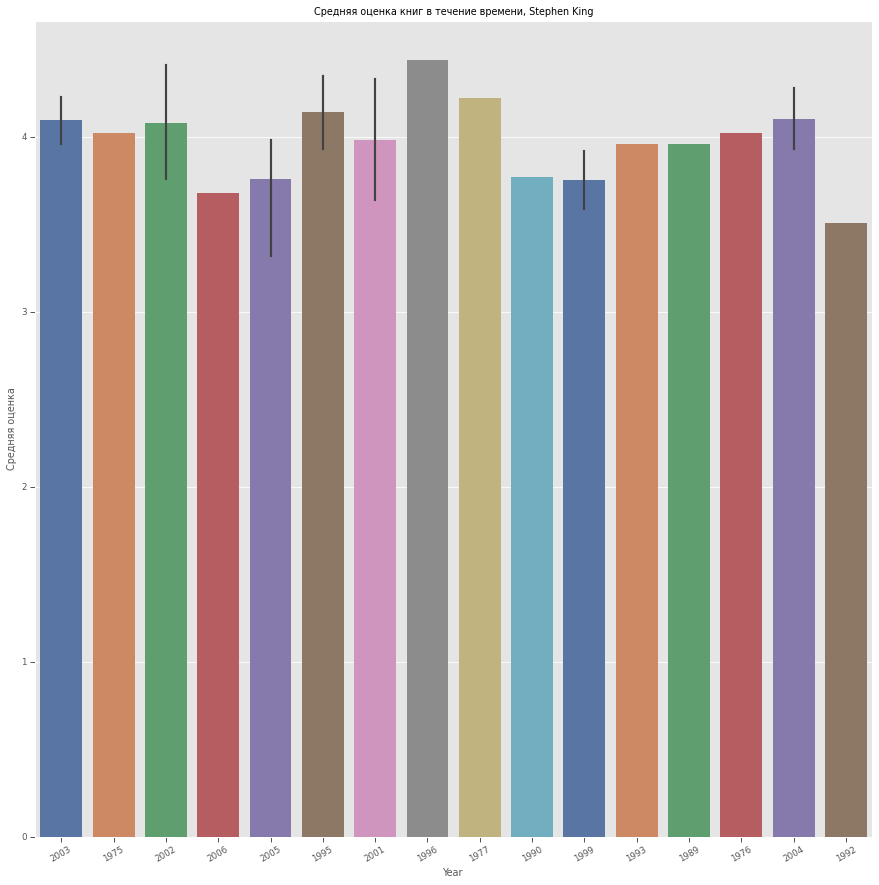

In [42]:
plot_author_chart(author_df)

In [75]:
# Пик Стивена Кинга был в 1996 году - средняя оценка книг была примерно 4.3. В целом, у него стабильная динамика, было лишь 
# 2 спада: в 1992 и 2006 году. Несмотря на это, Стивен Кинг действительно является легендой. 

100% |########################################################################|


<AxesSubplot:title={'center':'Средняя оценка книг в течение времени, Agatha Christie'}, xlabel='Year', ylabel='Средняя оценка'>

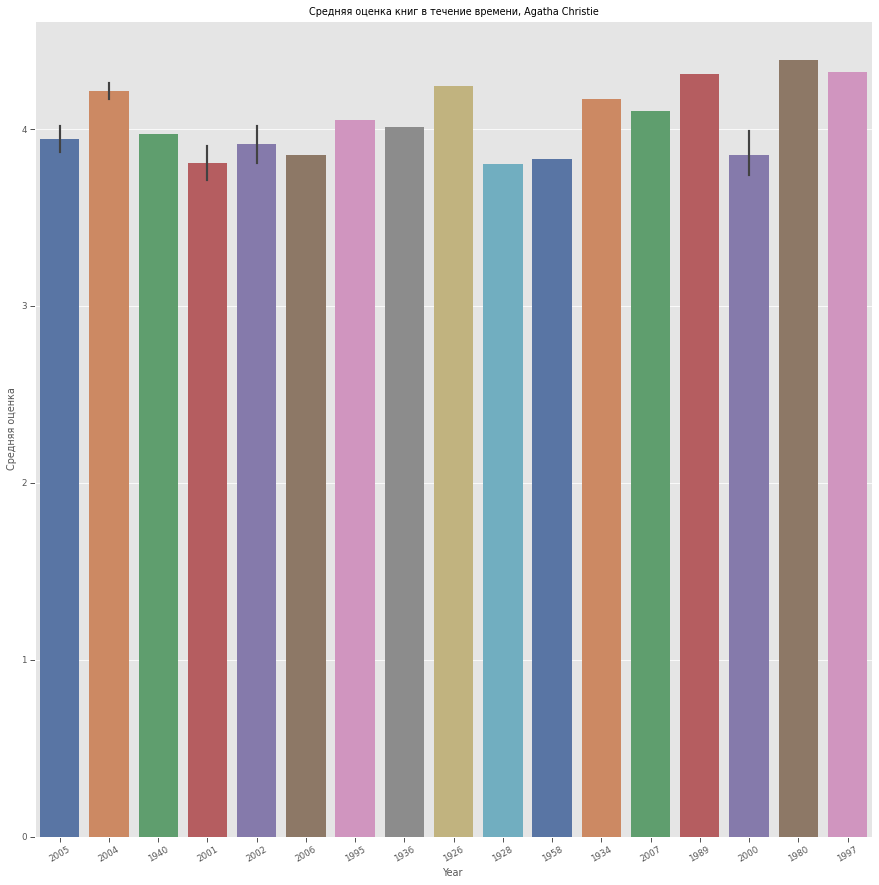

In [44]:
author_df = df[df['authors']==authors[1]]
author_df = author_df[author_df['language_code']=='eng']
plot_author_chart(author_df)

In [45]:
# Средняя оценка книг Агаты Кристи - 4. По сравнению со Стивеном Кингом, оценка ее книг наименее изменчива и сохраняет тренд. 

100% |########################################################################|


<AxesSubplot:title={'center':'Средняя оценка книг в течение времени, J.K. Rowling'}, xlabel='Year', ylabel='Средняя оценка'>

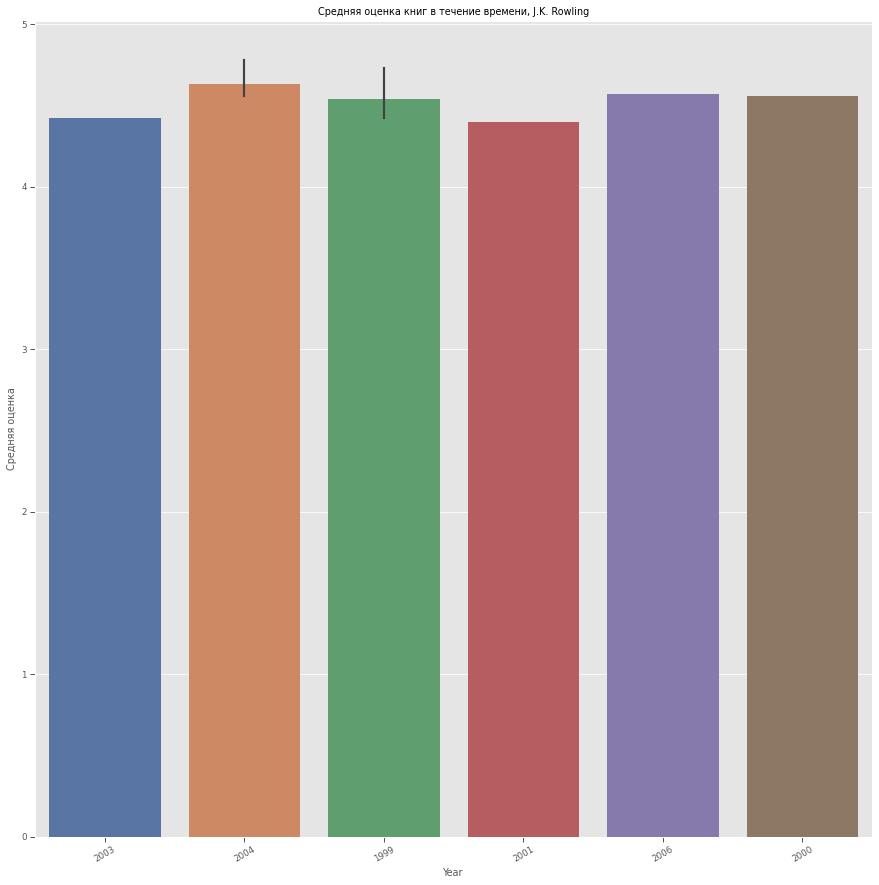

In [46]:
author_df = df[df['authors']==authors[2]]
author_df = author_df[author_df['language_code']=='eng']
plot_author_chart(author_df)

In [47]:
# Гарри Поттер. На протяжении десятилетия, все рейтинги куда выше 4-х. Феномен этой эпохи и любимая книга большинства.

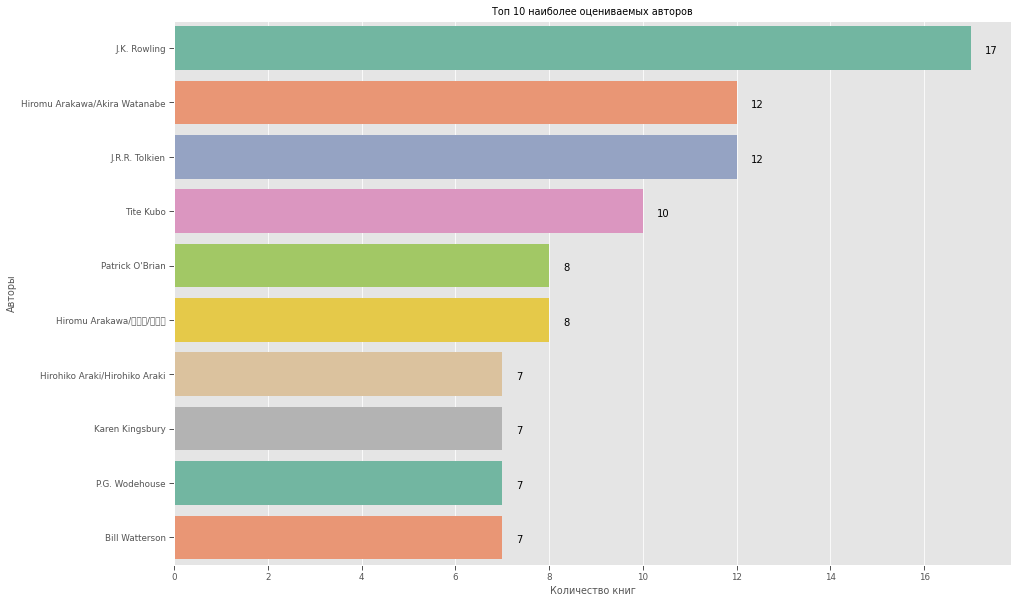

In [48]:
# Топ 10 наиболее оцениваемых авторов (средняя оценка которых > 4.3)
high_rated_author = df[df['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
plt.xlabel('Количество книг')
plt.ylabel('Авторы')
plt.title('Топ 10 наиболее оцениваемых авторов')
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [49]:
# Распределение оценок книг

In [76]:
df.average_rating.isnull().value_counts()

False    11123
Name: average_rating, dtype: int64

In [77]:
# Замена Null на 0 
df.dropna(0, inplace=True) 

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

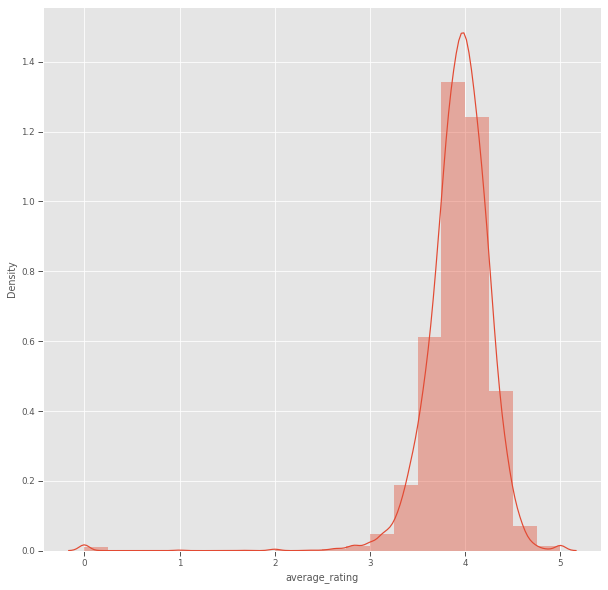

In [78]:
plt.figure(figsize=(10,10))
rating= df.average_rating.astype(float)
sns.distplot(rating, bins=20)

In [53]:
# Из графика видно, что:
# 1. Большинство книг имеет рейтинг 3.7-4.3
# 2. Очень мало книг с рейтингом 5 

In [54]:
# Зависимость между рейтингом и количеством рецензий

<Figure size 1080x720 with 0 Axes>

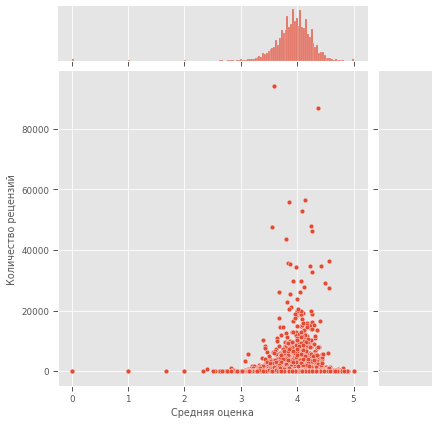

In [55]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax=sns.jointplot(x='average_rating',y='text_reviews_count', kind='scatter',  data= df[['text_reviews_count', 'average_rating']])
ax.set_axis_labels('Средняя оценка', 'Количество рецензий')
plt.show()

In [56]:
# Из графика видно, что большая часть рейтинга лежит в промежутке 3-4, при числе рецензий примерно 5000
# посмотрим этот график

<Figure size 1080x720 with 0 Axes>

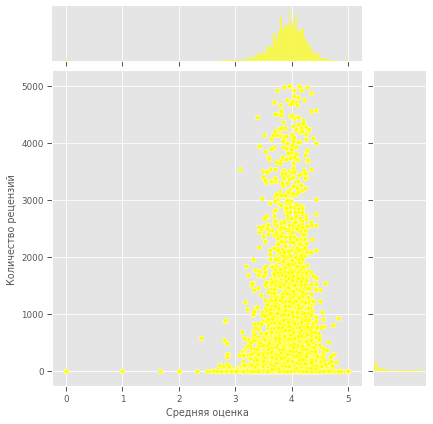

In [57]:
trial = df[~(df['text_reviews_count']>5000)]
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x='average_rating',y='text_reviews_count', kind='scatter',  data= trial, color = 'yellow')
ax.set_axis_labels('Средняя оценка', 'Количество рецензий')
plt.show()

In [58]:
# Можно заметить, что большая часть рецензий находится ниже 1000. Возможно здесь и есть какая-либо зависимость, но кажется,
# что рецензии преобладают у книг с высоким рейтингом.

In [59]:
# Зависимость между количеством страниц и рейтингом

<Figure size 1080x720 with 0 Axes>

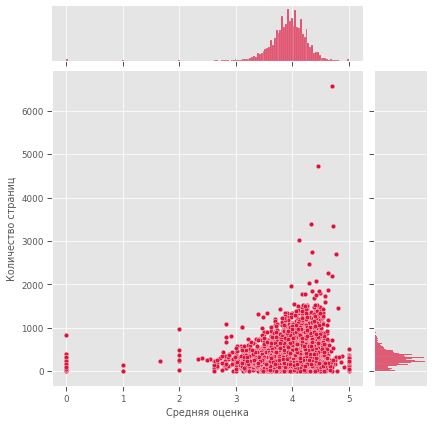

In [60]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x='average_rating', y='  num_pages', data= df, color = 'crimson')
ax.set_axis_labels('Средняя оценка', 'Количество страниц')

In [61]:
# по графику сложно сделать выводы, из-за огромного количества выбросов для книг, число страниц которых > 1000
# максимальная плотность книг находится в диапазоне 0-1000 страниц
# посмотрим этот график в другом масштабе

In [62]:
trial = df[~(df['  num_pages']>1000)]

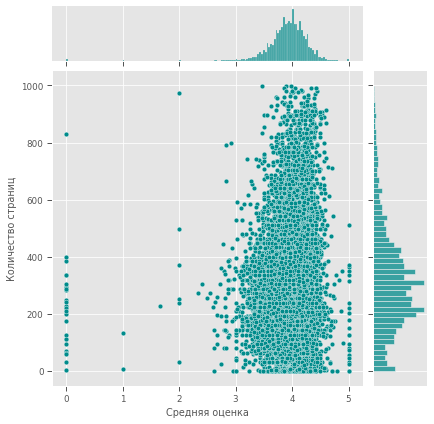

In [63]:
ax = sns.jointplot(x='average_rating', y='  num_pages', data = trial, color = 'darkcyan')
ax.set_axis_labels('Средняя оценка', 'Количество страниц')

In [64]:
# Можно сделать вывод, что самые рейтинги, которые давались - для книг, с количеством страниц 200-400. Пик приходится на 250 стр.
# возможно, большинство людей предпочитает книги с "умеренным" количеством страниц и боятся более толстых книг

In [65]:
# Зависимость между средней оценкой и количеством оценок

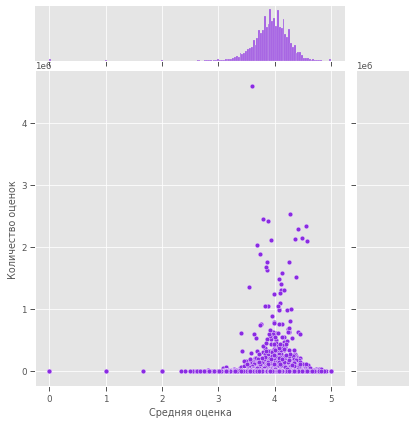

In [66]:
sns.set_context('paper')
ax = sns.jointplot(x='average_rating', y='ratings_count', data = df, color = 'blueviolet')
ax.set_axis_labels('Средняя оценка', 'Количество оценок')

In [67]:
# На этом графике много выбросов. Выберем более узкую область

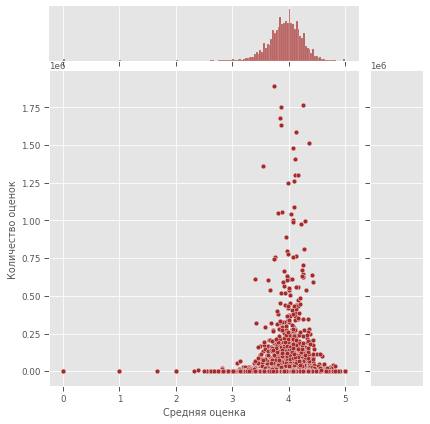

In [68]:
trial = df[~(df.ratings_count>2000000)]
sns.set_context('paper')
ax = sns.jointplot(x='average_rating', y='ratings_count', data = trial, color = 'brown')
ax.set_axis_labels('Средняя оценка', 'Количество оценок')

In [69]:
# Из графика можно увидеть, что здесь присутствует потенциальная зависимость между средней оценкой и количеством оценок. 
# При увеличении количества рейтингов, оценка стремится к 4. При уменьшении - оценка становится более разреженной. 

In [70]:
# Книги с наибольшим числом рецензий

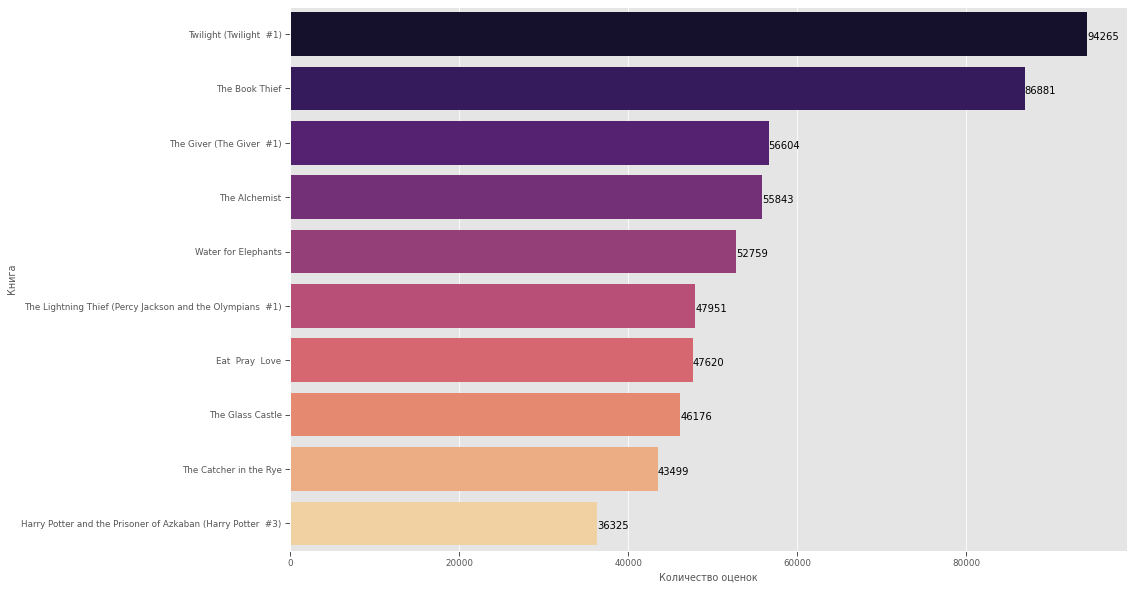

In [71]:
most_text = df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.barplot(most_text['text_reviews_count'], most_text.index, palette='magma')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
plt.xlabel('Количество оценок')
plt.ylabel('Книга')
plt.show()

In [72]:
# Вывод: несмотря на то, что рецензии имеют высокое значение, между ними и оценкой книг нет прямой зависимости. 

## Выводы

1. Проведен анализ предметной области "книги".
2. Рассмотрены распределения, для определения зависимости между признаками.
3. Построены визуализации.

In [111]:
import requests
from time import sleep

def data_mos_ru_libraries():
    API_KEY = 'd0f03e3c87a66846239c2de7cc0e6294'
    dataset_id = 526

    response = requests.get(url=f'https://apidata.mos.ru/v1/datasets/{dataset_id}/count', params={'api_key': API_KEY})
    count = int(response.text)
    url = f'https://apidata.mos.ru/v1/datasets/{dataset_id}/rows'
    answer = []

    for i in range(0, count, 100):
        params = {
            'api_key': API_KEY,
            '$orderby': 'global_id',
            '$top': 100,
            '$skip': i
        }
        sleep(2)
        response = requests.get(url=url, params=params)
        if (response.status_code == 200):
            data = response.json()
            answer.extend(data)
    return answer

In [112]:
library_dataset = data_mos_ru_libraries()

In [181]:
library_dataset[0]['Cells'].keys()

dict_keys(['CommonName', 'FullName', 'ShortName', 'OrgInfo', 'ObjectAddress', 'ChiefOrg', 'ChiefName', 'ChiefPosition', 'PublicPhone', 'Fax', 'Email', 'WorkingHours', 'ClarificationOfWorkingHours', 'WebSite', 'NumOfSeats', 'NumOfReaders', 'NumOfVisitors', 'global_id', 'geoData'])

In [182]:
from shapely.geometry import Point, MultiPoint
from geopandas import GeoSeries
def response_to_dict(response_item):
    converter = {
        'Number': response_item['Number'],
        'CommonName': response_item['Cells']['CommonName'],
        'FullName': response_item['Cells']['FullName'],
        'ShortName': response_item['Cells']['ShortName'],
        'ChiefPhone': response_item['Cells']['OrgInfo'][0]['ChiefPhone'][0]['ChiefPhone'],
        'Address': response_item['Cells']['ObjectAddress'][0]['Address'],
        'ChiefName': response_item['Cells']['ChiefName'],
        'ChiefPosition': response_item['Cells']['ChiefPosition'],
        'AdmArea': response_item['Cells']['ObjectAddress'][0]['AdmArea'],
        'NumOfSeats': response_item['Cells']['NumOfSeats'],
        'Coordinates' : str(Point(response_item['Cells']['geoData']['coordinates'][0])),
    }                
    return converter

In [184]:
import geopandas
import pandas as pd
from shapely import wkt

geo_dataset = []
geo_dataset.extend([response_to_dict(i) for i in library_dataset])

In [185]:
geo_pd_data = pd.DataFrame(geo_dataset)
type(geo_pd_data['Coordinates'].iloc[0])
geo_pd_data['Coordinates'] = geopandas.GeoSeries.from_wkt(geo_pd_data['Coordinates'])
# gdf = geopandas.GeoDataFrame(geo_pd_data, geometry='Coordinates')

In [203]:
geo_pd_data

,Number,CommonName,FullName,ShortName,ChiefPhone,Address,ChiefName,ChiefPosition,AdmArea,NumOfSeats,Coordinates
0,1,Библиотека №140,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ ЮАО», Библиотека №140",(495) 682-44-22,"Российская Федерация, город Москва, внутригоро...",Алмазова-Долженко Людмила Константиновна,заведующий,Южный административный округ,30.0,POINT (37.68599 55.58397)
1,2,Библиотека №166 имени 1-го Мая,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ ЮАО», Библиотека №166 им. ...",(495) 682-44-22,"Российская Федерация, город Москва, внутригоро...",Явцева Анастасия Владимировна,исполняющий обязанности руководителя,Южный административный округ,20.0,POINT (37.58662 55.70862)
2,3,Библиотека №169 «Проспект»,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ ЮЗАО», Библиотека №169 «Пр...",(495) 420-05-37,"город Москва, Ленинский проспект, дом 127",Мережкина Ольга Юрьевна,заведующий,Юго-Западный административный округ,34.0,POINT (37.47793 55.64616)
3,4,Библиотека №266 имени К.И. Чуковского,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ ТиНАО», Библиотека №266 им...",(495) 444-50-24,"город Москва, поселение Внуковское, посёлок ДС...",Хлыстова Ольга Владимировна,заведующий,Новомосковский административный округ,15.0,POINT (37.33100 55.65903)
4,5,Библиотека №115,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ ЮВАО», Библиотека №115",(499) 170-84-10,"Российская Федерация, город Москва, внутригоро...",Сонина Наталия Витальевна,заведующий,Юго-Восточный административный округ,52.0,POINT (37.78296 55.70854)
...,...,...,...,...,...,...,...,...,...,...,...
264,65,Библиотека №56,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ СВАО», Библиотека №56",(495) 687-75-71,"Российская Федерация, город Москва, внутригоро...",Гребенщикова Елена Анатольевна,заведующий,Северо-Восточный административный округ,80.0,POINT (37.60633 55.87389)
265,66,Библиотека №61,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ СВАО», Библиотека №61",(495) 687-75-71,"Российская Федерация, город Москва, внутригоро...",Аллахвердян Яна Олеговна,заведующий,Северо-Восточный административный округ,43.0,POINT (37.67605 55.86157)
266,67,Библиотека № 54,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ СВАО», Библиотека №54",(495) 687-75-71,"Российская Федерация, город Москва, внутригоро...",Касаева Аза Хазбиевна,заведующий,Северо-Восточный административный округ,49.0,POINT (37.66072 55.88821)
267,68,Библиотека №222,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ОКЦ ЗАО», Библиотека №222",(495) 415-90-54,"город Москва, улица Богданова, дом 44",Леонова Динара Сяитовна,заведующий,Западный административный округ,24.0,POINT (37.39646 55.65125)
